In [25]:
# https://musicinformationretrieval.com/hpss.html
# 맥북 m1에서 librosa 설치 : conda install scikit-learn librosa ??
# https://gist.github.com/lnoth/2b0d1d9f776bafc0b36b5bbedcd73f53

# 맥북에서 설치 안됨 (250206)

%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

- Harmonic-Percussive Source Separation
- Load two files: one harmonic, and one percussive.

In [26]:
xh, sr_h = librosa.load('audio/prelude_cmaj.wav', duration=7, sr=None)

In [27]:
ipd.Audio(xh, rate=sr_h)

In [28]:
xp, sr_p = librosa.load('audio/125_bounce.wav', duration=7, sr=None)

In [29]:
ipd.Audio(xp, rate=sr_p)

In [30]:
print(len(xh), len(xp))

154350 154350


In [31]:
print(sr_h, sr_p)

22050 22050


Add the two signals together, and rescale:

In [32]:
x = xh/xh.max() + xp/xp.max()
x = 0.5 * x/x.max()

In [33]:
x.max()

0.5

In [34]:
ipd.Audio(x, rate=sr_h)

Compute the STFT:

In [35]:
X = librosa.stft(x)

In [37]:
# x를 mp3 파일로 변환하는 코드를 만들어 : chap 15 코드로 추가 분석해보기 (250206)

# 파일 이름 : beethoven.mp4, mozart.mp3

import soundfile
import numpy as np

soundfile.write("mozart.mp3", 
                np.column_stack((x, x)), 
                sr_p, 
                format='mp3')

soundfile.write("beethoven.mp3", 
                np.column_stack((x, x)),   # 스테레오 채널로 만들기 - 컬럼으로 결합 : 모노를 스테레오 처럼 (250206)
                sr_p, 
                format='mp3')



Take the log-ampllitude for display purposes:

In [14]:
Xmag = librosa.amplitude_to_db(X)

C:\Users\wonta\AppData\Local\Temp\ipykernel_18840\2334191688.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Xmag = librosa.amplitude_to_db(X)


Display the log-magnitude spectrogram:

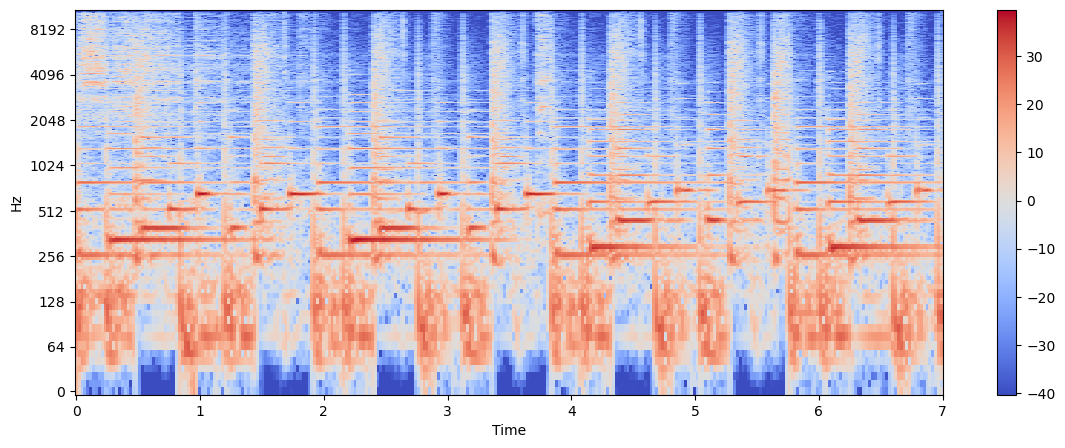

In [ ]:
librosa.display.specshow(Xmag, sr=sr_h, x_axis='time', y_axis='log')
plt.colorbar()

Perform harmonic-percussive source separation:

In [16]:
H, P = librosa.decompose.hpss(X)

Compute the log-amplitudes of the outputs:

In [17]:
Hmag = librosa.amplitude_to_db(H)
Pmag = librosa.amplitude_to_db(P)

C:\Users\wonta\AppData\Local\Temp\ipykernel_18840\1759482750.py:1: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Hmag = librosa.amplitude_to_db(H)
C:\Users\wonta\AppData\Local\Temp\ipykernel_18840\1759482750.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Pmag = librosa.amplitude_to_db(P)


Display each output:

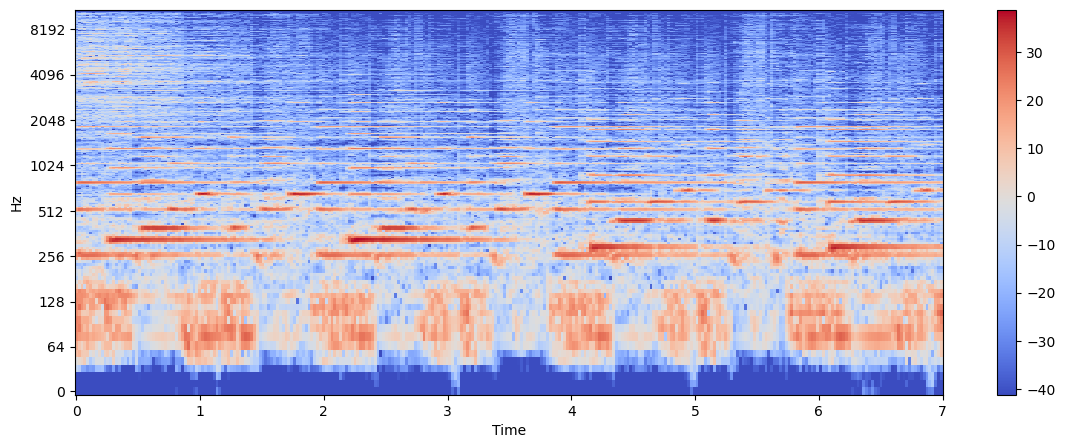

In [ ]:
librosa.display.specshow(Hmag, sr=sr_h, x_axis='time', y_axis='log')
plt.colorbar()

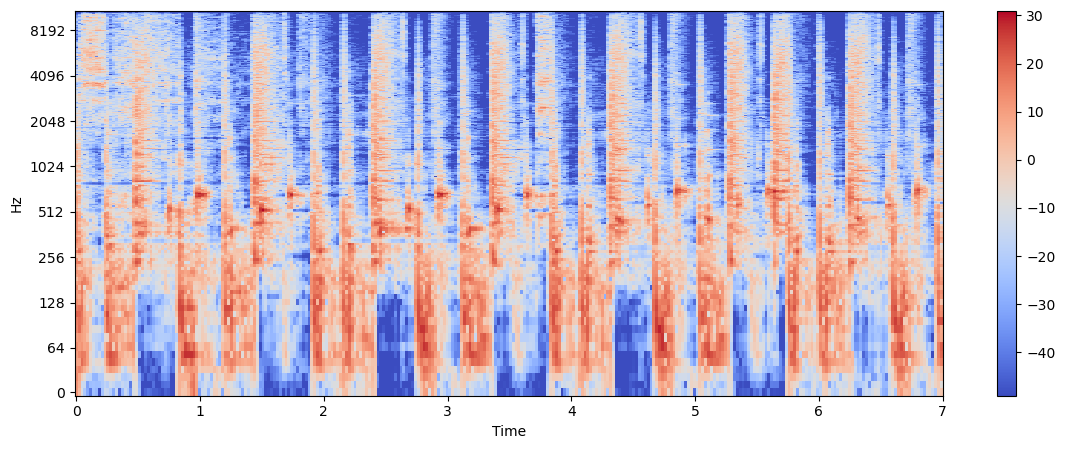

In [ ]:
librosa.display.specshow(Pmag, sr=sr_p, x_axis='time', y_axis='log')
plt.colorbar()

Transform the harmonic output back to the time domain:

In [20]:
h = librosa.istft(H)

Listen to the harmonic output:

In [21]:
ipd.Audio(h, rate=sr_h)

Transform the percussive output back to the time domain:

In [22]:
p = librosa.istft(P)

Listen to the percussive output:

In [ ]:
ipd.Audio(p, rate=sr_p)